# Regression Comparison

## Jorge Alberto Padilla Gutierrez

The image processing was done thanks to kapernikov guide on image classification :)

# Imports

In [1]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
import joblib
from collections import Counter

# Algorithm

In [2]:
def resize_images(src, name, include, width=420, height=None):
    """
    I am trying to rezise the images to a 420p resolution
    And also store them in RGB format so I can use their variables
    """
    # height will be equal to width if not defined
    height = height if height is not None else width

    data = dict()
    data['description'] = f"resized ({width}x{height})world wonder images in rgb"
    data['label'] = []          # This will be our 'y'
    data['filename'] = []
    data['data'] = []           # This would contain our Xs

    # The pickle file is new for me, not sure if necesary
    pklname = f"{name}_{width}x{height}.pkl"

    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current = os.path.join(src, subdir)
            for file in os.listdir(current):
                if file[-3:] in {'jpg', 'png'}:      # png jpg, maybe jpeg fails?
                    try:
                        print(file)
                        image = imread(os.path.join(current, file))
                        image = resize(image, (width, height))  # is this all?
                        data['label'].append(subdir)
                        data['filename'].append(file)
                        data['data'].append(image)
                    except:
                        print(f'{file} failed, skipping')
                        pass
        joblib.dump(data,name)



In [3]:
# Let's test that
path = fr'{os.path.abspath(os.getcwd())}\..\data\raw'

name = "wonders"
width = 420
# Testing some dirs, not all
include = {
    'Potala Palace',
    'El Palacio de las Bellas Artes',
    'El Angel de la Independencia',
    'Alhambra',
    'Amundsen-Scott Research Station',
    'Great Pyramid of Giza',
    'Stonehenge'
}

# resize_images(path, name, include, width)

Samples:  5323
Keys:  ['description', 'label', 'filename', 'data']
Description:  resized (64x64)world wonder images in rgb
Labels: ['Alhambra' 'Amundsen-Scott Research Station' 'Angkor Wat' 'Apadana'
 'Big Ben' 'Biosphere de Montreal' 'Bolshoi Theatre' 'Broadway'
 'Casa de Contratacion' 'Chichen Itza' 'Christ the Redeemer' 'Colosseum'
 'Colossus of Rhodes' 'Eiffel Tower' 'El Angel de la Independencia'
 'El Palacio de las Bellas Artes' 'Estadio do Maracana' 'Etemenaki'
 'Forbidden City' 'Golden Gate Bridge' 'Great Library of Alexandria'
 'Great Pyramid of Giza' 'Great Wall of China' 'Great Zimbabwe'
 'Greath Bath' 'Hagia Sophia' 'Hanging Gardens of Babylon' 'Hermitage'
 'Huey Teocalli' 'Jebel Barkal' 'Kilwa Kisiwani' 'Kotokou-in'
 'Leaning Tower of Pisa' 'Lighthouse of Alexandria' 'Machu Picchu'
 'Mahabodhi Temple' 'Mausoleum at Halicarnassus' 'Meenakshi Temple'
 'Mont St. Michel' 'Oracle of Delphi' 'Orszaghaz' 'Oxford University'
 'Panama Canal' 'Petra' 'Potala Palace' 'Ruhr Valley'
 '

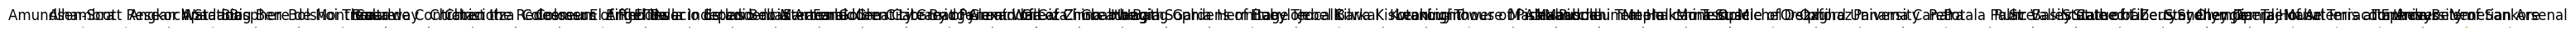

In [13]:
data = joblib.load(fr'{os.path.abspath(os.getcwd())}\..\data\processed\World_Wonders_64x64.pkl')
print('Samples: ', len(data['data']))
print('Keys: ', list(data.keys()))
print('Description: ', data['description'])
print('Labels:', np.unique(data['label']))
print(Counter(data['label']))
# Print them with plt
labels = np.unique(data['label'])

fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()

# Print only one for each label
for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
    
    ax.imshow(data['data'][idx])
    ax.axis('off')
    ax.set_title(label)

C:\Users\japadill\AppData\Local\Temp\ipykernel_7592\489446185.py:3: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  fig.tight_layout()


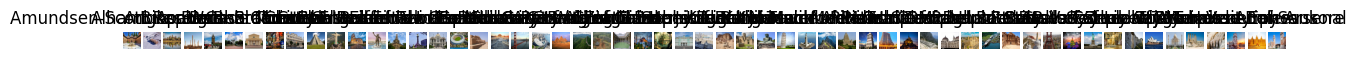

In [15]:
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()

# Print only one for each label
for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
    
    ax.imshow(data['data'][idx])
    ax.axis('off')
    ax.set_title(label)